In this example, I wrote code to find the values of `c1`, `c2`, and `c3` using the matrix `A` and vector `b` given in the text. These values are from MATLAB, and using them helps us match the example exactly.

Because the signal is noisy, the coefficients can change each time. But by using the exact `A` and `b`, we get the same values as in the book. I also calculated the error `J`, which measures how close our approximation `xhat` is to the original signal `xn`.

In the next block, I’ll write a program to find these `c` values and calculate `J` without using predefined `A` and `b`. Instead, I’ll calculate them based on `xn`.

C1: -1.2456738596491115, C2: 0.7042314012303458, C3: -0.033184814308498393, J: 23.58606778799114


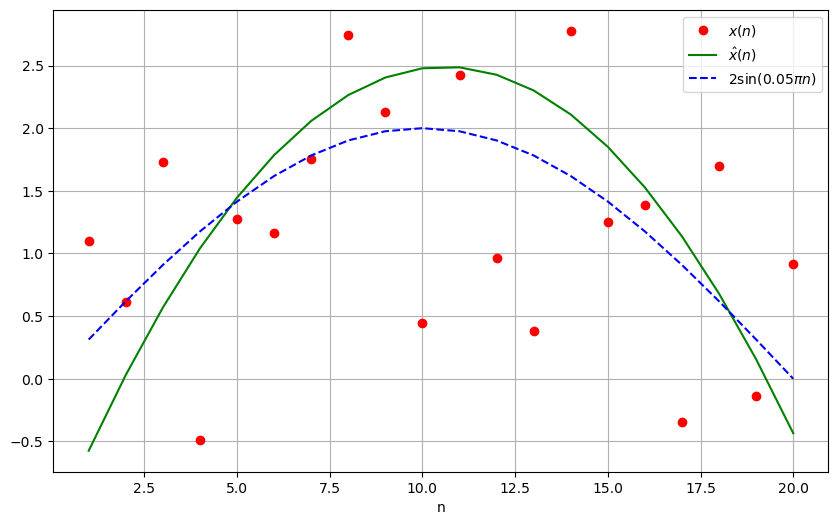

In [4]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([                   # define matrix A
    [20, 210, 2870],
    [210, 2870, 44100],
    [2870, 44100, 722666]
])

b = np.array([27.7347, 296.1023, 3499.9838])   # define vector b

c1, c2, c3 = np.linalg.solve(A, b)             # solve for c1, c2, c3

n = np.arange(1, 21)                           # create sequence 1 to 20
xn = 2 * np.sin(0.05 * np.pi * n) + np.random.randn(20)  # add noise to xn
xhat = c1 + c2 * n + c3 * n**2                 # compute estimated xhat
J = np.sum((xn - xhat) ** 2)                   # compute error cost J

print(f"C1: {c1}, C2: {c2}, C3: {c3}, J: {J}") # print coefficients and J

plt.figure(figsize=(10, 6))
plt.plot(n, xn, 'o', label=r"$x(n)$", color="red")               # plot observed xn
plt.plot(n, xhat, '-', label=r"$\hat{x}(n)$", color="green")     # plot estimated xhat
plt.plot(n, 2 * np.sin(0.05 * np.pi * n), '--', label=r"$2\sin(0.05\pi n)$", color="blue")  # plot sine

plt.xlabel("n")                              # set x-axis label
plt.legend()                                 # show legend
plt.grid(True)                               # show grid

This code finds the best-fit polynomial coefficients `c1`, `c2`, and `c3` for a noisy signal `x(n)` using the least squares method.

Steps:
- Generate `x(n)` as a noisy sine wave.
- Calculate matrix `A` and vector `b` based on `x(n)`.
- Solve for `c1`, `c2`, and `c3` to estimate `xhat`.
- Calculate the error `J` to see how well `xhat` fits `x(n)`.

While I used manual calculations here, `polyfit` in Python could simplify this process.

C1: 0.49589017251733347, C2: 0.365895948829213, C3: -0.01931742840883166, J: 22.743938220122416


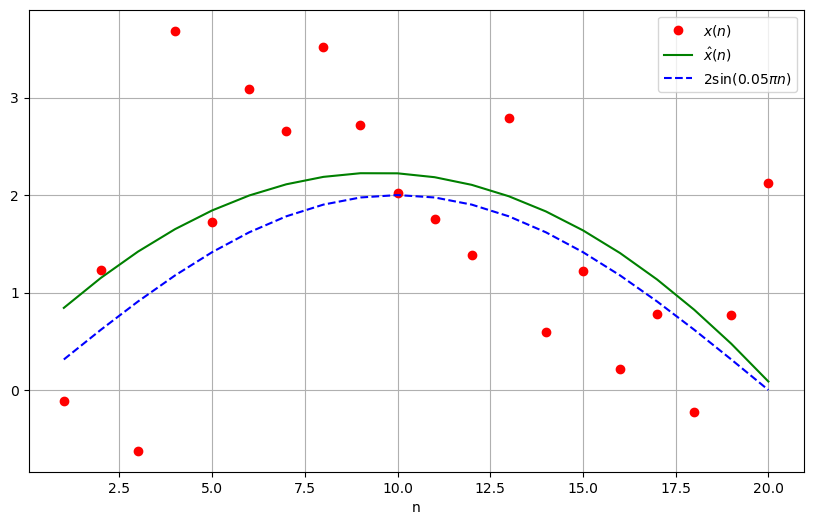

In [7]:
N = 20
n = np.arange(1, N + 1)                           # create sequence 1 to N
xn = 2 * np.sin(0.05 * np.pi * n) + np.random.randn(N)  # add noise to xn

A = np.array([                                     # build matrix A
    [np.sum(n**0), np.sum(n**1), np.sum(n**2)],    # for n^0, n^1, n^2
    [np.sum(n**1), np.sum(n**2), np.sum(n**3)],    # for n^1, n^2, n^3
    [np.sum(n**2), np.sum(n**3), np.sum(n**4)]     # for n^2, n^3, n^4
])

b = np.array([                                     # build vector b
    np.sum(xn),                                    # sum of x(n)
    np.sum(n * xn),                                # sum of n * x(n)
    np.sum(n**2 * xn)                              # sum of n^2 * x(n)
])

c1, c2, c3 = np.linalg.solve(A, b)                 # solve for c1, c2, c3
xhat = c1 + c2 * n + c3 * n**2                     # compute estimated xhat
J = np.sum((xn - xhat) ** 2)                       # compute error cost J

print(f"C1: {c1}, C2: {c2}, C3: {c3}, J: {J}")     # print coefficients and J

plt.figure(figsize=(10, 6))
plt.plot(n, xn, 'o', label=r"$x(n)$", color="red")         # plot observed xn
plt.plot(n, xhat, '-', label=r"$\hat{x}(n)$", color="green")  # plot estimated xhat
plt.plot(n, 2 * np.sin(0.05 * np.pi * n), '--', label=r"$2\sin(0.05\pi n)$", color="blue")  # plot sine

plt.xlabel("n")                                    # set x-axis label
plt.legend()                                       # show legend
plt.grid(True)                                     # show grid

This code runs multiple iterations to generate `xn` for each run, find `xhat` (the polynomial fit), calculate `J` (the error), and find the coefficients `c1`, `c2`, and `c3`.

Steps:
1. Generate `xn` for each run.
2. Find `c1`, `c2`, and `c3`, then calculate `xhat` and `J`.
3. Store `xhat`, `c1`, `c2`, `c3`, and `J` for each run.

After all runs:
- Compute stats (mean, std, min, max) for `c1`, `c2`, `c3`, and `J`.
- Plot `c1`, `c2`, `c3`, and `J` across runs to observe variability.

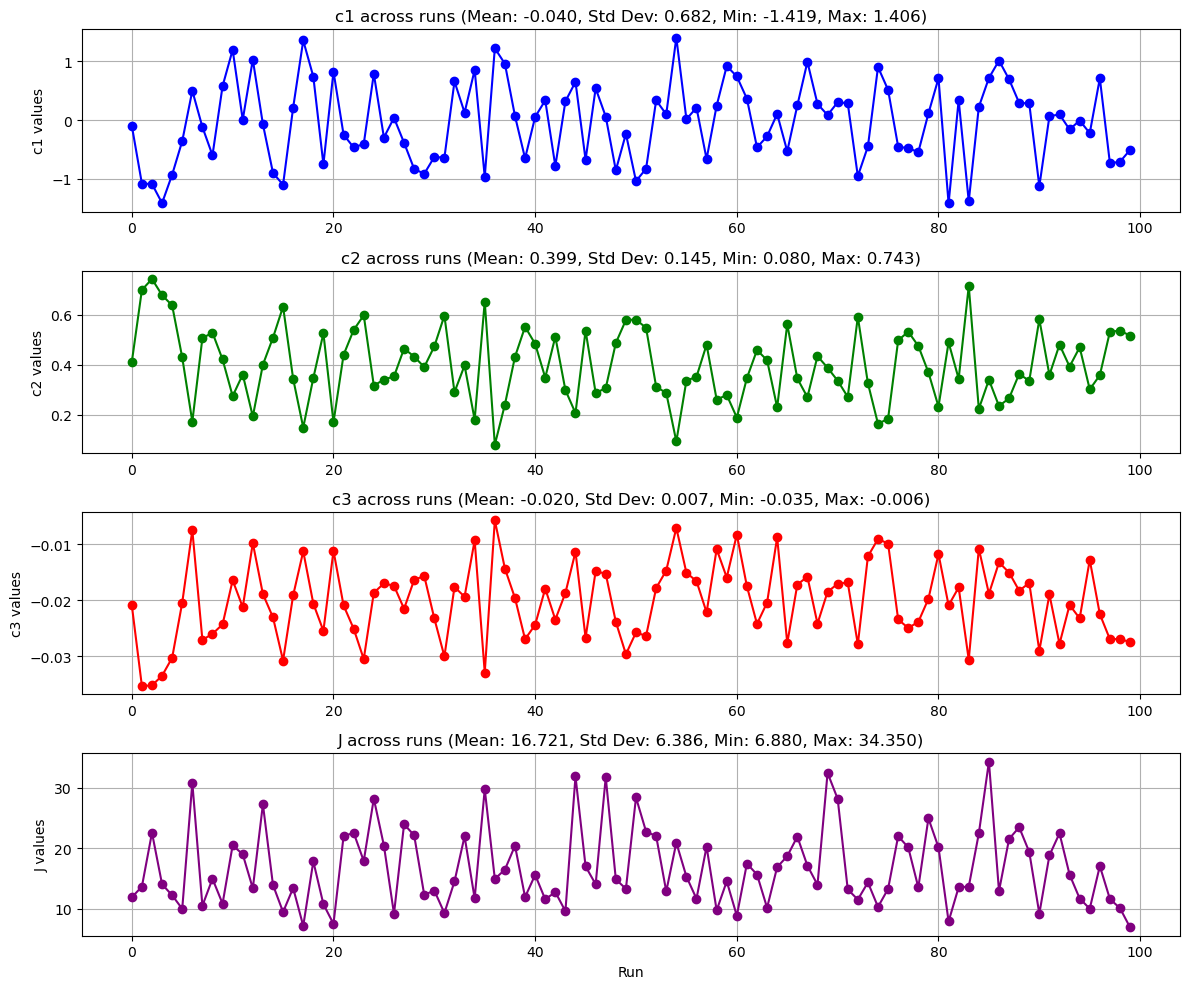

In [10]:
N = 20                                # number of points
runs = 100                            # number of runs
results = []                          # store coefficients and errors

n = np.arange(1, N + 1)               # sequence 1 to N
all_xhats = np.empty((runs, N))       # initialize array for xhats

for run in range(runs):
    xn = 2 * np.sin(0.05 * np.pi * n) + np.random.randn(N)  # noisy signal
    A = np.array([                                     # build matrix A
        [np.sum(n**0), np.sum(n**1), np.sum(n**2)],    # for n^0, n^1, n^2
        [np.sum(n**1), np.sum(n**2), np.sum(n**3)],    # for n^1, n^2, n^3
        [np.sum(n**2), np.sum(n**3), np.sum(n**4)]     # for n^2, n^3, n^4
    ])
    
    b = np.array([                                     # build vector b
        np.sum(xn),                                    # sum of x(n)
        np.sum(n * xn),                                # sum of n * x(n)
        np.sum(n**2 * xn)                              # sum of n^2 * x(n)
    ])
    
    c1, c2, c3 = np.linalg.solve(A, b)                 # solve for c1, c2, c3
    xhat = c1 + c2 * n + c3 * n**2                     # estimated xhat
    all_xhats[run, :] = xhat                           # store xhat for each run
    J = np.sum((xn - xhat) ** 2)                       # calculate error J

    results.append((c1, c2, c3, J))

# separate results into individual lists
c1s, c2s, c3s, Js = zip(*results)

# calculate statistics for c1s, c2s, c3s, and Js
c1s_mean, c1s_std, c1s_min, c1s_max = np.mean(c1s), np.std(c1s), np.min(c1s), np.max(c1s)
c2s_mean, c2s_std, c2s_min, c2s_max = np.mean(c2s), np.std(c2s), np.min(c2s), np.max(c2s)
c3s_mean, c3s_std, c3s_min, c3s_max = np.mean(c3s), np.std(c3s), np.min(c3s), np.max(c3s)
Js_mean, Js_std, Js_min, Js_max = np.mean(Js), np.std(Js), np.min(Js), np.max(Js)

# plot c1s, c2s, c3s, and Js across runs
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(c1s, marker='o', linestyle='-', color='b')
plt.title(f"c1 across runs (Mean: {c1s_mean:.3f}, Std Dev: {c1s_std:.3f}, Min: {c1s_min:.3f}, Max: {c1s_max:.3f})")
plt.ylabel("c1 values")
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(c2s, marker='o', linestyle='-', color='g')
plt.title(f"c2 across runs (Mean: {c2s_mean:.3f}, Std Dev: {c2s_std:.3f}, Min: {c2s_min:.3f}, Max: {c2s_max:.3f})")
plt.ylabel("c2 values")
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(c3s, marker='o', linestyle='-', color='r')
plt.title(f"c3 across runs (Mean: {c3s_mean:.3f}, Std Dev: {c3s_std:.3f}, Min: {c3s_min:.3f}, Max: {c3s_max:.3f})")
plt.ylabel("c3 values")
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(Js, marker='o', linestyle='-', color='purple')
plt.title(f"J across runs (Mean: {Js_mean:.3f}, Std Dev: {Js_std:.3f}, Min: {Js_min:.3f}, Max: {Js_max:.3f})")
plt.xlabel("Run")
plt.ylabel("J values")
plt.grid(True)

plt.tight_layout()                    # adjust layout

This code visualizes the undisturbed signal, the mean of estimated fits (`xhat`), and individual polynomial fits across multiple runs.

Steps:
1. Plot the undisturbed signal `2 * sin(0.05 * π * n)` as a reference.
2. Plot the mean of all `xhat` estimates across runs in red.
3. For up to 20 individual runs, plot each polynomial estimate `xhat` with its corresponding error `J` (in lighter color to reduce visual clutter).

The plot shows how well the polynomial fits (`xhat`) approximate the undisturbed signal across different runs, and the mean fit provides an average trend.

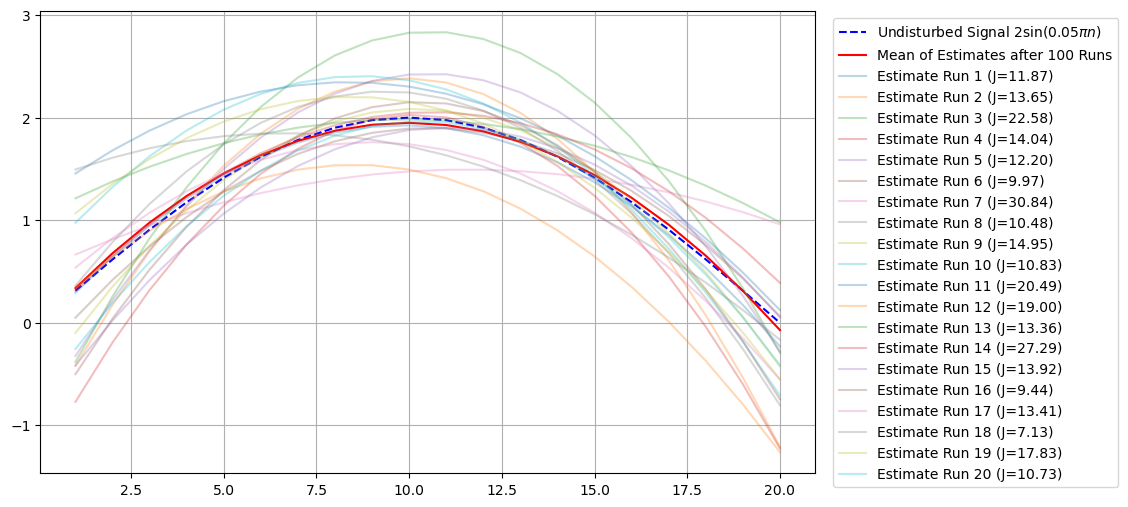

In [13]:
plt.figure(figsize=(10, 6))

# Plot the undisturbed signal
plt.plot(n, 2 * np.sin(0.05 * np.pi * n), '--', color="blue", label=r"Undisturbed Signal $2\sin(0.05\pi n)$")

# Plot the mean of all `xhat` estimates across runs
plt.plot(n, all_xhats.mean(0), color="red", label=f"Mean of Estimates after {runs} Runs")

# Plot estimated polynomial for each run, limited to 20 runs
for i, (c1, c2, c3, J) in enumerate(results[:20]):
    xhat = c1 + c2 * n + c3 * n**2                  # compute xhat for this run
    plt.plot(n, xhat, '-', label=f"Estimate Run {i+1} (J={J:.2f})", alpha=0.3)  # plot with low alpha

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))  # position legend
plt.grid(True)

This plot shows the undisturbed signal and the mean of `xhat` across multiple runs.

Steps:
1. Plot the undisturbed signal `2 * sin(0.05 * π * n)` as a reference (blue dashed line).
2. Plot the mean of all `xhat` estimates from multiple runs (red line).

The mean of `xhat` fits closely matches the undisturbed signal. Averaging reduces noise, giving a clearer view of the true signal trend.

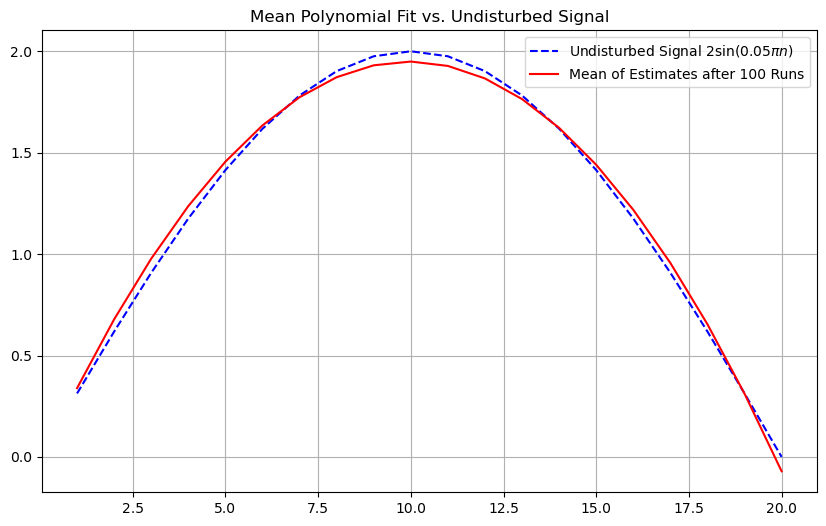

In [16]:
plt.figure(figsize=(10, 6))

# Plot the undisturbed (noise-free) signal as a reference
plt.plot(n, 2 * np.sin(0.05 * np.pi * n), '--', color="blue", label=r"Undisturbed Signal $2\sin(0.05\pi n)$")

# Plot the mean of all `xhat` estimates across runs
plt.plot(n, all_xhats.mean(0), color="red", label=f"Mean of Estimates after {runs} Runs")

plt.title("Mean Polynomial Fit vs. Undisturbed Signal")
plt.legend(loc="upper right")
plt.grid(True)

This code fits a noisy signal `x(n)` using polynomials of different degrees (3, 5, and 8) to see how increasing parameters affects the error `J` and potential overfitting.

Steps:
1. Plot the noisy signal `x(n)` and the undisturbed signal for reference.
2. For each polynomial degree (3, 5, and 8):
   - Build the design matrix `A` for the polynomial fit.
   - Use least squares to find the coefficients.
   - Calculate `xhat` (the estimated signal) and `J` (error).
   - Plot each polynomial fit with its degree and error `J`.

Conclusion:
As we increased the polynomial degree, the error \( J \) decreased, showing a closer fit to the data. However, higher degrees, like 8, generally led to overfitting by capturing noise instead of the true trend, causing unwanted oscillations. While degree 5 often provided a good balance, it sometimes overfit the data due to noise. This shows that even moderate degrees can overfit in noisy conditions, and finding an optimal degree depends on balancing fit accuracy with avoiding noise sensitivity.

Degree 3: J = 20.89
Degree 5: J = 19.38
Degree 8: J = 14.27


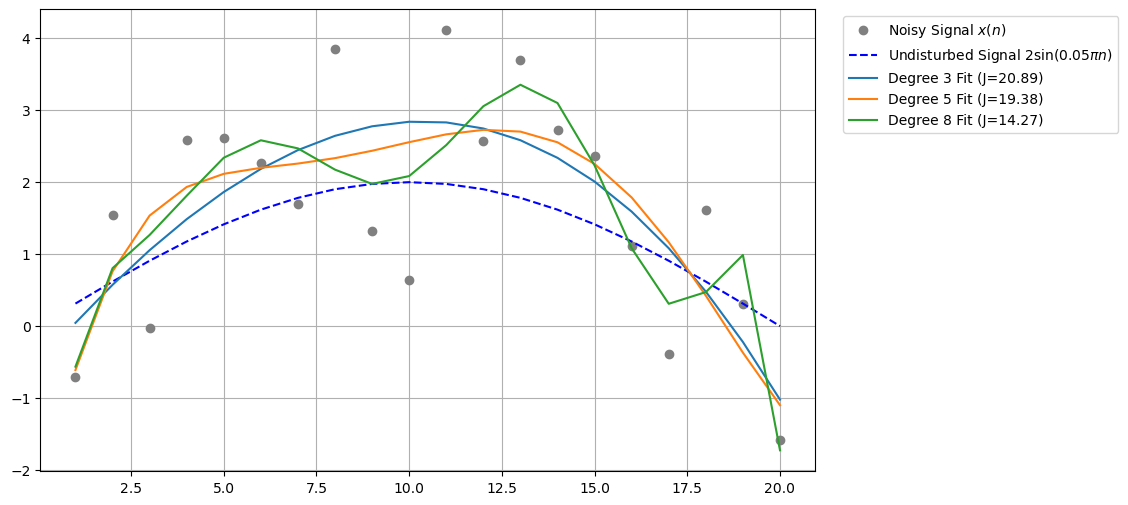

In [35]:
N = 20
degrees = [3, 5, 8]  # Polynomial degrees to test

n = np.arange(1, N + 1)                           # sequence 1 to N
x = 2 * np.sin(0.05 * np.pi * n) + np.random.randn(N)  # noisy signal

plt.figure(figsize=(10, 6))

# Plot the noisy and undisturbed signals
plt.plot(n, x, 'o', label=r"Noisy Signal $x(n)$", color="gray")
plt.plot(n, 2 * np.sin(0.05 * np.pi * n), '--', label=r"Undisturbed Signal $2\sin(0.05\pi n)$", color="blue")

# Fit polynomials of different degrees
for degree in degrees:
    A = np.vstack([n**i for i in range(degree + 1)]).T       # design matrix for polynomial of 'degree'
    coeffs = np.linalg.lstsq(A, x, rcond=None)[0]            # least-squares fit for coefficients
    xhat = A @ coeffs                                        # estimated signal using coefficients
    J = np.sum((x - xhat) ** 2)                              # calculate error J
    
    print(f"Degree {degree}: J = {J:.2f}")                   # print J for each degree
    plt.plot(n, xhat, '-', label=f"Degree {degree} Fit (J={J:.2f})")  # plot polynomial fit

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.grid(True)